In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [12]:
file_path = r'C:\Users\crhac\CATSSP\CATSSP\CGL\cgl_33.catsp'

with open(file_path, 'r') as f:
    lines = f.readlines()

In [13]:
for line in lines:
    if "DIMENSION" in line:
        n = int(line.strip().split(":")[1])
        break

for idx, line in enumerate(lines):
    if "EDGE_WEIGHT_SECTION" in line:
        start_idx = idx + 1
        break

In [14]:
costos = []
for i in range(n):
    fila = list(map(int, lines[start_idx + i].strip().split()))
    costos.append(fila)

In [15]:
C = np.array(costos)
print(f"Matriz de costos cargada con dimensión {C.shape}")
print(C)

nodos = list(range(n))
solucion = []
actual = 0 
visitados = {actual}
solucion.append(actual)

Matriz de costos cargada con dimensión (34, 34)
[[  -1  179 1247 ...   -1   -1    0]
 [ 208   -1 1227 ...   -1   -1    0]
 [1284 1232   -1 ...   -1   -1    0]
 ...
 [  -1   -1   -1 ...   -1    0    0]
 [  -1   -1   -1 ...    0   -1    0]
 [   0    0    0 ...    0    0    0]]


In [16]:
while len(visitados) < n:
    costos_permitidos = [(j, C[actual, j]) for j in nodos if j not in visitados and C[actual, j] != -1]
    if not costos_permitidos:
        break
    siguiente = min(costos_permitidos, key=lambda x: x[1])[0]
    solucion.append(siguiente)
    visitados.add(siguiente)
    actual = siguiente

costo_total = 0
for i in range(len(solucion) - 1):
    costo_total += C[solucion[i], solucion[i+1]]

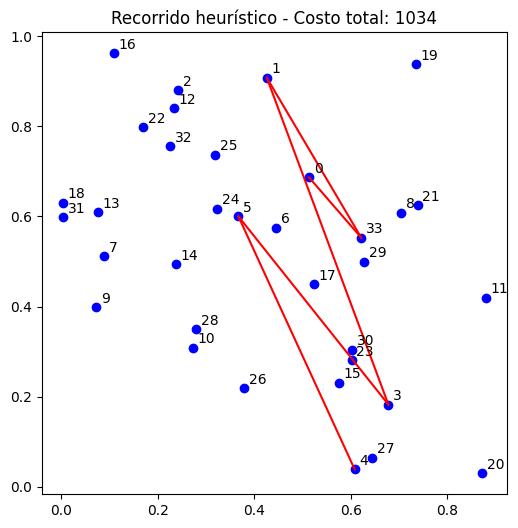

   Posición  Nodo
0         0     0
1         1    33
2         2     1
3         3     3
4         4     5
5         5     4
Costo total de la solución heurística: 1034


In [17]:
plt.figure(figsize=(6, 6))
puntos = np.random.rand(n, 2)
for i in range(n):
    plt.scatter(puntos[i, 0], puntos[i, 1], c='blue')
    plt.text(puntos[i, 0]+0.01, puntos[i, 1]+0.01, str(i), fontsize=10)
for i in range(len(solucion) - 1):
    plt.plot([puntos[solucion[i], 0], puntos[solucion[i+1], 0]],
             [puntos[solucion[i], 1], puntos[solucion[i+1], 1]], 'r-')
plt.title(f'Recorrido heurístico - Costo total: {costo_total}')
plt.show()

df_resultado = pd.DataFrame({'Posición': range(len(solucion)), 'Nodo': solucion})
print(df_resultado)
print(f"Costo total de la solución heurística: {costo_total}")


In [18]:
#Neighbourhood Search (Búsqueda Local simple - 2-opt)

def costo_total(secuencia, C):
    return sum(C[secuencia[i], secuencia[i+1]] for i in range(len(secuencia)-1))

def neighbourhood_search(C, iteraciones=100):
    n = C.shape[0]
    nodos = list(range(n))
    
    # Construcción inicial con Greedy
    solucion = []
    actual = 0
    visitados = {actual}
    solucion.append(actual)
    while len(visitados) < n:
        costos_permitidos = [(j, C[actual, j]) for j in nodos if j not in visitados and C[actual, j] != -1]
        if not costos_permitidos:
            break
        siguiente = min(costos_permitidos, key=lambda x: x[1])[0]
        solucion.append(siguiente)
        visitados.add(siguiente)
        actual = siguiente

    mejor = solucion[:]
    mejor_costo = costo_total(mejor, C)

    # Búsqueda local con intercambios (2-opt)
    for _ in range(iteraciones):
        i, j = sorted(random.sample(range(1, n), 2))
        nueva = mejor[:i] + mejor[i:j][::-1] + mejor[j:]
        nuevo_costo = costo_total(nueva, C)
        if nuevo_costo < mejor_costo:
            mejor, mejor_costo = nueva, nuevo_costo

    return mejor, mejor_costo

In [19]:
#GRASP (Greedy Randomizado con mejora local)

def grasp(C, alpha=0.3, iteraciones=100):
    n = C.shape[0]
    nodos = list(range(n))
    mejor_solucion = None
    mejor_costo = float('inf')

    for _ in range(iteraciones):
        solucion = []
        actual = 0
        visitados = {actual}
        solucion.append(actual)

        while len(visitados) < n:
            candidatos = [(j, C[actual, j]) for j in nodos if j not in visitados and C[actual, j] != -1]
            if not candidatos:
                break
            candidatos.sort(key=lambda x: x[1])
            k = max(1, int(len(candidatos) * alpha))
            siguiente = random.choice(candidatos[:k])[0]
            solucion.append(siguiente)
            visitados.add(siguiente)
            actual = siguiente

        costo = costo_total(solucion, C)
        if costo < mejor_costo:
            mejor_solucion = solucion[:]
            mejor_costo = costo

    return mejor_solucion, mejor_costo

In [20]:
def graficar_solucion(solucion, C, puntos, titulo):
    n = C.shape[0]
    
    plt.figure(figsize=(6, 6))
    for i in range(n):
        plt.scatter(puntos[i, 0], puntos[i, 1], c='blue')
        plt.text(puntos[i, 0]+0.01, puntos[i, 1]+0.01, str(i), fontsize=10)
    
    for i in range(len(solucion) - 1):
        plt.plot([puntos[solucion[i], 0], puntos[solucion[i+1], 0]],
                 [puntos[solucion[i], 1], puntos[solucion[i+1], 1]], 'r-')
    
    costo = sum(C[solucion[i], solucion[i+1]] for i in range(len(solucion) - 1))
    plt.title(f'{titulo} - Costo total: {costo}')
    plt.show()


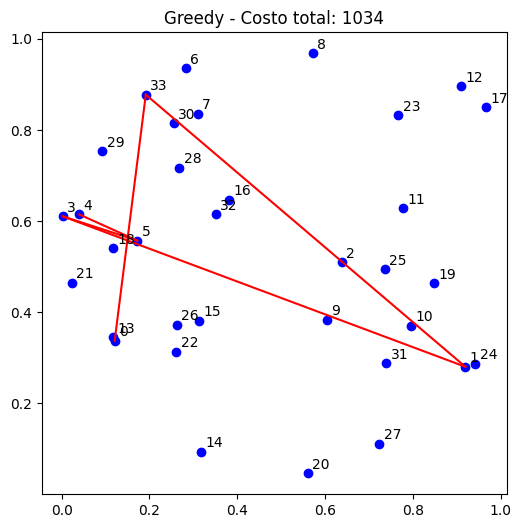

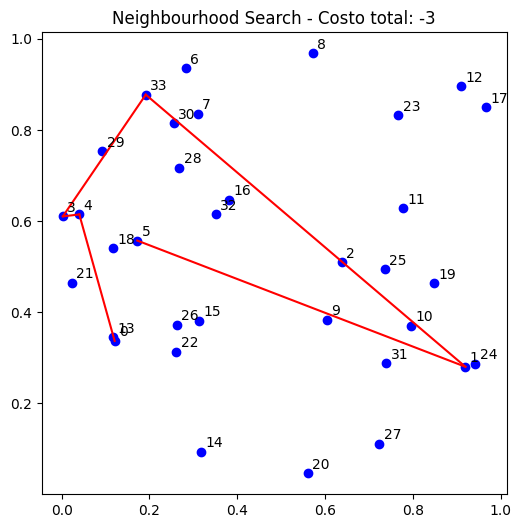

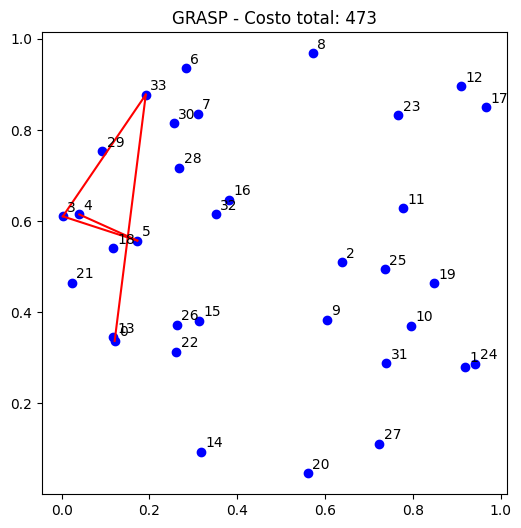

In [21]:
# Fijar puntos aleatorios solo una vez para todos los gráficos
puntos = np.random.rand(n, 2)

# 1. Greedy
graficar_solucion(solucion, C, puntos, "Greedy")

# 2. Neighbourhood Search
mejor_ns, costo_ns = neighbourhood_search(C)
graficar_solucion(mejor_ns, C, puntos, "Neighbourhood Search")

# 3. GRASP
mejor_grasp, costo_grasp = grasp(C)
graficar_solucion(mejor_grasp, C, puntos, "GRASP")
